In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
new_df = pd.read_csv("Car_Price_prediction.csv")


In [8]:
new_df.shape

(205, 13)

In [9]:
new_df.isnull().sum()

car_ID            0
fueltype          0
doornumber        0
carbody           3
enginelocation    1
wheelbase         1
carlength         1
carwidth          2
carheight         0
curbweight        0
cylindernumber    4
enginesize        0
price             0
dtype: int64

In [10]:
new_df["fueltype"] = new_df.fueltype.replace('gas',1)
new_df["fueltype"] = new_df.fueltype.replace('diesel',0)

new_df["doornumber"] = new_df.doornumber.replace('two',0)
new_df["doornumber"] = new_df.doornumber.replace('four',1)

new_df["carbody"] = new_df.carbody.replace('convertible',0)
new_df["carbody"] = new_df.carbody.replace('hatchback',1)
new_df["carbody"] = new_df.carbody.replace('sedan',2)
new_df["carbody"] = new_df.carbody.replace('wagon',3)
new_df["carbody"] = new_df.carbody.replace('hardtop',4)

new_df["enginelocation"] = new_df.enginelocation.replace('front',1)
new_df["enginelocation"] = new_df.enginelocation.replace('rear',0)

new_df["cylindernumber"] = new_df.cylindernumber.replace('three',0)
new_df["cylindernumber"] = new_df.cylindernumber.replace('four',1)
new_df["cylindernumber"] = new_df.cylindernumber.replace('five',2)
new_df["cylindernumber"] = new_df.cylindernumber.replace('six',3)
new_df["cylindernumber"] = new_df.cylindernumber.replace('eight',4)
new_df["cylindernumber"] = new_df.cylindernumber.replace('twelve',5)


In [11]:
final_df=new_df.fillna(new_df.mode().iloc[0])
final_df.isnull().sum()

car_ID            0
fueltype          0
doornumber        0
carbody           0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
price             0
dtype: int64

In [12]:
final_df.head()

,car_ID,fueltype,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,price
0,1,1,0,0.0,1.0,88.6,168.8,64.1,48.8,2548,1,130,13495.0
1,2,1,0,0.0,1.0,88.6,168.8,64.1,48.8,2548,1,130,16500.0
2,3,1,0,1.0,1.0,94.5,171.2,65.5,52.4,2823,3,152,16500.0
3,4,1,1,2.0,1.0,99.8,176.6,66.2,54.3,2337,1,109,13950.0
4,5,1,1,2.0,1.0,99.4,176.6,66.4,54.3,2824,2,136,17450.0


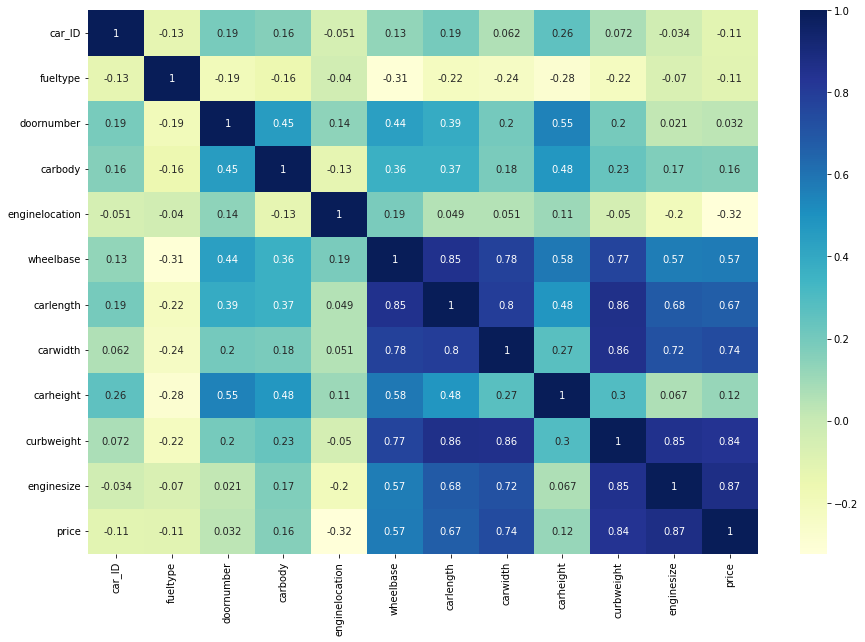

In [15]:
import seaborn as sns

correlation_matrix = final_df.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="YlGnBu")


In [16]:
important_feature= final_df.drop(["car_ID","fueltype","doornumber","carbody","carheight"], axis='columns')


In [17]:
important_feature.head()

,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,price
0,1.0,88.6,168.8,64.1,2548,1,130,13495.0
1,1.0,88.6,168.8,64.1,2548,1,130,16500.0
2,1.0,94.5,171.2,65.5,2823,3,152,16500.0
3,1.0,99.8,176.6,66.2,2337,1,109,13950.0
4,1.0,99.4,176.6,66.4,2824,2,136,17450.0


In [18]:

important_feature.to_csv("car_prediction_new.csv")

In [19]:
df_02=pd.read_csv("car_prediction_new.csv")

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X = df_02.iloc[:,0:6].values
y = df_02.iloc[:,7].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [37]:
import sklearn.metrics as sm
import numpy as np 

print("R2 score =", round(sm.r2_score(y_test, y_pred)*100, 2),"%")

R2 score = 71.2 %
